In [1]:
import math
import numpy as np

In [2]:
def getfocus(a,ecc):
    c=a*ecc
    return c

In [3]:
def getsemiminor(a,ecc):
    c=getfocus(a,ecc)
    b=np.sqrt(a**2-c**2)
    return b

In [4]:
import math
def InitialDataEqualMassConic(radius,ecc,angle,initmass):
    orbitalangle=angle
    print("angle",angle)
    phi=np.array([math.pi+orbitalangle,orbitalangle])
    orbitalradius=radius #semimajor axis
    eccentricity=ecc
    print(eccentricity)
    mass=np.ones(2)
    masses=initmass*mass #*masssun (natural units)
    return phi,orbitalangle,orbitalradius,eccentricity, masses
    

In [5]:
import random,numpy as np
rad0=50.
ecc0=0.9
theta0=math.pi/6. #math.pi/6.
mass0=1.0
initdateqellipse=InitialDataEqualMassConic(rad0,ecc0,theta0,mass0)
print(initdateqellipse)

angle 0.5235987755982988
0.9
(array([3.66519143, 0.52359878]), 0.5235987755982988, 50.0, 0.9, array([1., 1.]))


In [6]:
def getxyuveqtwoellipses(initdat):
    phi,orbitangle,orbitalradius,eccentricity, masses=initdat
    print("initdat", orbitalradius, phi, eccentricity, np.cos(phi), np.sin(phi))
    metersperAU=1
    Gconstant=1
    #fix x0 y0 at one star, disregard initial data, use orbital radius as separation between stars
    #this is consistant with choice in previous part
    cosphi=np.cos(phi)
    sinphi=np.sin(phi)
    coordsep=orbitalradius #/2.
    print("coordsep",coordsep)
    #x0=orbitalradius/2.*np.cos(phi)*metersperAU
    #y0=orbitalradius/2.*np.sin(phi)*metersperAU
    count=0
    for phi0 in phi:
        if phi0==0:
            print("zero")
            #x0[count]=orbitalradius[count]/2.
            #y0[count]=0
            cosphi[count]=1.0
            sinphi[count]=0.0
        if phi0==math.pi:
            cosphi[count]=-1.0
            sinphi[count]=0.0
            print("pi")
            #x0[count]=-orbitalradius[count]/2.
            #y0[count]=0
        if phi0==math.pi/2.:
            cosphi[count]=0.0
            sinphi[count]=1.0
            #x0[count]=0
            #y0[count]=orbitalradius[count]/2.
        if phi0==3*math.pi/2.:
            cosphi[count]=0.0
            sinphi[count]=-1.0
            #x0[count]=0
            #y0[count]=-orbitalradius[count]/2.
        count+=1
    x0=coordsep*cosphi
    y0=coordsep*sinphi
    #x0[1]=0.0
    #y0[1]=0.0
    z0=np.zeros(2)
    print(x0)
    print(y0)
    v=np.zeros(2)
    a=np.zeros(2)
    ux0=0.
    uy0=0.
    uz0=0.
    ax0=0.
    ay0=0.
    az0=0.
    vx0=0.
    vy0=0.
    vz0=0.
    print(eccentricity)
    #masses=np.zeros(2)
    #masses[0]=masses[1]+masses[0]
    #masses[1]=(masses[1]*masses[0])/(masses[1]+masses[0])
    if eccentricity<1 and eccentricity>0:
        #elliptical
        orbitalr=orbitalradius #NO REDUCED MASS 
        #focusdisp=getfocus(orbitalr,eccentricity) #displacement of the center due to the focus being at the center
        coordsep=orbitalr*(1+eccentricity) #start at aphelion
        x0=(coordsep)*cosphi
        y0=(coordsep)*sinphi
        starsep=np.sqrt((x0[0]-x0[1])**2+(y0[0]-y0[1])**2) #two stars, at opposite ends of the orbit
        Fapastron=masses[1]*masses[0]/starsep**2
        #print('xycomp',coordsep,focusdisp,x0,y0)
        #x0[0]=0.0
        #y0[0]=0.0
        v=np.zeros(2)
        #v= np.sqrt(masses[1]*masses[0]/masses*(2./starsep-1./(2*orbitalr)))
        vapsq=masses[1]*masses[0]/masses/orbitalr*(1-eccentricity)/(1+eccentricity)/4.
        #vapsq=masses[1]*masses[0]/masses*(1./(coordsep)-1./orbitalr)/2.
        v=np.sqrt(vapsq)
        #v= np.sqrt(masses[1]*masses[0]/masses*(1./orbitalr-2./starsep))
        ux0=-v*sinphi
        uy0=v*cosphi #initial data in y only 
        uz0=np.zeros(2)
    
        print("vstuff", coordsep,orbitalr, 2./coordsep, 1./orbitalr, (2./starsep-1./(2.*orbitalr)), 1./(coordsep))
        
        a=np.zeros(2)
        a=Fapastron/masses
    
        ax0=-a*cosphi
        ay0=-a*sinphi
        az0=np.zeros(2)
    elif eccentricity[0]==0.0: #circular
        #start at perihelion for both (eliptical, doesn't generalize to three body)
        #actually start with circular orbit
        ux0=np.zeros(2) #*149597870700
        #centrepital force balances gravitational force
        metersperAU=1 #natural units
        #G=1
        Gconstant=1
        #Fcentripital=mass1*v**2/rphys
        #centF=accel
        #Faccel=G*m1*m2/r^2
        r0=2.*orbitalradius #Mystery factor of 2
        print("r0", r0)
        v=np.zeros(2)
        for i in np.arange(2):
            v[i]=np.sqrt(Gconstant*masses[(i+1)%2]/np.abs(r0[i]))
        print(v)
        #r0=orbitalradius #np.sqrt(x0**2+y0**2)
        ux0=-v[0]*sinphi
        uy0=v[1]*cosphi #initial data in y only 
        uz0=np.zeros(2)
    
        a=np.zeros(2)
        a=Fapastron/masses
    
        ax0=-a[0]*cosphi
        ay0=-a[1]*sinphi
        az0=np.zeros(2)

    statevec=[]
    avec=[]
    for i in np.arange(len(x0)):
        stateveci=np.array([x0[i],y0[i],z0[i],ux0[i],uy0[i],uz0[i]])
        aveci=np.array([ax0[i],ay0[i],az0[i]])
        statevec.append(stateveci)
        avec.append(aveci)
    statevecnp=np.array(statevec)
    avecnp=np.array(avec)
    return masses, statevecnp,avecnp

In [7]:
xyuvaeqellipse=getxyuveqtwoellipses(initdateqellipse)
print(xyuvaeqellipse)
masses,xvec,avec=xyuvaeqellipse

initdat 50.0 [3.66519143 0.52359878] 0.9 [-0.8660254  0.8660254] [-0.5  0.5]
coordsep 50.0
[-43.30127019  43.30127019]
[-25.  25.]
0.9
vstuff 95.0 50.0 0.021052631578947368 0.02 0.000526315789473682 0.010526315789473684
(array([1., 1.]), array([[-8.22724134e+01, -4.75000000e+01,  0.00000000e+00,
         8.11107106e-03, -1.40487872e-02,  0.00000000e+00],
       [ 8.22724134e+01,  4.75000000e+01,  0.00000000e+00,
        -8.11107106e-03,  1.40487872e-02,  0.00000000e+00]]), array([[ 2.39896234e-05,  1.38504155e-05,  0.00000000e+00],
       [-2.39896234e-05, -1.38504155e-05,  0.00000000e+00]]))


In [8]:
def RK4implicit(h,t,xvec,f): #not a finite difference so no step in y
    k1= h*f(t,xvec)
    k2=h*f(t+h/2, xvec+k1/2)
    k3=h*f(t+h/2,xvec+k2/2)
    k4=h*f(t+h,xvec+k3)
    return t+h, xvec+1/6.*(k1+2.*k2+2.*k3+k4)

In [9]:
class OrbitDiffEqOld:
    def __init__(self,masses,xvec,avec,t0):
        self.masses=masses
        self.xvec=xvec
        self.ti=t0
        self.avec=avec
    def dxidt(self,t,xvec):
        return xvec[:,3].transpose()
    def dyidt(self,t,xvec):
        return xvec[:,4].transpose()
    def dzidt(self,t,xvec):
        return xvec[:,5].transpose()
    def dvxidt(self,t,xvec):
        #return axi[m]
        axii=np.zeros(len(xvec[:,0]))
        rii=np.sqrt(xvec[:,0]**2+xvec[:,1]**2+xvec[:,2]**2)
        Gconstant=1 #6.408*10**-11
        for k in np.arange(len(rii)):
            for j in np.arange(len(rii)):
                if j!=k:
                    #print(j,k,xvec[j,0],xvec[k,0],xvec[j,0]-xvec[k,0])
                    rreljk=np.abs((xvec[j,0] - xvec[k,0])**2+(xvec[j,1]-xvec[k,1])**2+(xvec[j,2]-xvec[k,2])**2)**(1./2.)
                    axii[j]-=Gconstant*self.masses[k]*(xvec[j,0]  - xvec[k,0])/rreljk**3
        return axii
    def dvyidt(self,t,xvec):
        #return axi[m]
        ayii=np.zeros(len(xvec[:,0]))
        rii=np.sqrt(xvec[:,0]**2+xvec[:,1]**2+xvec[:,2]**2)
        Gconstant=1 #6.408*10**-11
        for k in np.arange(len(rii)):
            for j in np.arange(len(rii)):
                if j!=k:
                    rreljk=np.abs((xvec[j,0] - xvec[k,0])**2+(xvec[j,1]-xvec[k,1])**2+(xvec[j,2]-xvec[k,2])**2)**(1./2.)
                    ayii[j]-=Gconstant*self.masses[k]*(xvec[j,1]  - xvec[k,1])/rreljk**3
        return ayii
    def dvzidt(self,t,xvec):
        #return axi[m]
        azii=np.zeros(len(xvec[:,0]))
        rii=np.sqrt(xvec[:,0]**2+xvec[:,1]**2+xvec[:,2]**2)
        Gconstant=1 #6.408*10**-11
        for k in np.arange(len(rii)):
            for j in np.arange(len(rii)):
                if j!=k:
                    rreljk=np.abs((xvec[j,0] - xvec[k,0])**2+(xvec[j,1]-xvec[k,1])**2+(xvec[j,2]-xvec[k,2])**2)**(1./2.)
                    azii[j]-=Gconstant*self.masses[k]*(xvec[j,2]  - xvec[k,2])/rreljk**3
        return azii
    
    def dvecdt(self,t,xvec):
        avec=np.array([self.dvxidt(self,xvec),self.dvyidt(self,xvec),self.dvzidt(self,xvec)])
        print("avec", avec)
        avecT=avec.transpose()
        self.avec=avecT
        dvec2=np.array([self.dxidt(t,xvec),self.dyidt(t,xvec),self.dzidt(self,xvec),avec[0,:],avec[1,:],avec[2,:]])
                       
        dvec2T=dvec2.transpose()
        return dvec2T
    def updateINTERNAL(self,xvecii,tii):
        self.xvec=xvecii
        self.ti=tii
        return self
    def update(self,xvecii,avecii,tii):
        self.xvec=xvecii
        self.avec=avecii,
        self.ti=tii
    def print2D(self):
        print(self.masses,self.xvec,self.ti)
        return self
    def list2D(self):
        return self.masses,self.xvec,self.avec,self.ti
    def timestepRK4ODE(self,step,dt):

    
        h=dt
        #tnew,ynew, intval=RK4(h,t,y,f)
        #m represents choices of mass
        i=step
        
        tnew,intvalxvec=RK4implicit(h,self.ti,self.xvec,self.dvecdt)
        #xii = intvalx
        #tnew,intvalvx=RK4implicit(h,self.ti,self.vxi,self.dvxidt)
        #vxii=intvalvx
        #tnew,intvaly=RK4implicit(h,self.ti,self.yi,self.dyidt)
        #yii = intvaly
        #tnew,intvalvy=RK4implicit(h,self.ti,self.vyi,self.dvyidt)
        #vyii=intvalvy
        #tnew,intvalz=RK4implicit(h,self.ti,self.zi,self.dzidt)
        #zii = intvalz
        #tnew,intvalvz=RK4implicit(h,self.ti,self.vzi,self.dvzidt)
        #vzii=intvalvz
        #axii=self.dvxidt(self.ti,np.zeros(np.shape(self.xi)))
        #ayii=self.dvyidt(self.ti,np.zeros(np.shape(self.yi)))
        #azii=self.dvzidt(self.ti,np.zeros(np.shape(self.zi)))
 
        #print(xii)
        self.updateINTERNAL(intvalxvec,tnew)
        return self.masses, self.xvec,self.avec,self.ti

In [10]:
class OrbitDiffEq:
    def __init__(self,masses,xvec,avec,t0):
        self.masses=masses
        self.xvec=xvec
        self.ti=t0
        self.avec=avec
    def dxidt(self,t,xvec):
        return xvec[:,3].transpose()
    def dyidt(self,t,xvec):
        return xvec[:,4].transpose()
    def dzidt(self,t,xvec):
        return xvec[:,5].transpose()
    def dvxidt(self,t,xvec):
        #return axi[m]
        axii=np.zeros(len(xvec[:,0]))
        #rii=np.sqrt(np.sum(xvec[:,0:3])**2)
        Gconstant=1 #6.408*10**-11
        for k in np.arange(len(xvec[:,0])):
            for j in np.arange(len(xvec[:,0])):
                if j!=k:
                    vecshift=xvec[j,:]-xvec[k,:]
                    #print(j,k,xvec[j,0],xvec[k,0],xvec[j,0]-xvec[k,0])
                    rreljk=np.sqrt(np.sum(vecshift[0:3]**2))
                    axii[j]-=Gconstant*self.masses[k]*(vecshift[0])/rreljk**3
        return axii
    def dvyidt(self,t,xvec):
        #return axi[m]
        ayii=np.zeros(len(xvec[:,0]))
        #rii=np.sqrt(np.sum(xvec[:,0:3]**2))
        Gconstant=1 #6.408*10**-11
        for k in np.arange(len(xvec[:,1])):
            for j in np.arange(len(xvec[:,1])):
                if j!=k:
                    vecshift=xvec[j,:]-xvec[k,:]
                    rreljk=np.sqrt(np.sum(vecshift[0:3]**2))
                    ayii[j]-=Gconstant*self.masses[k]*(vecshift[1])/rreljk**3
        return ayii
    def dvzidt(self,t,xvec):
        #return axi[m]
        azii=np.zeros(len(xvec[:,0]))
        #rii=np.sqrt(np.squm(xvec[:,0:3]**2))
        Gconstant=1 #6.408*10**-11
        for k in np.arange(len(xvec[:,1])):
            for j in np.arange(len(xvec[:,1])):
                if j!=k:
                    vecshift=xvec[j,:]-xvec[k,:]
                    rreljk=np.sqrt(np.sum(vecshift[0:3]**2))
                    azii[j]-=Gconstant*self.masses[k]*(vecshift[2])/rreljk**3
        return azii
    
    def dvecdt(self,t,xvec):
        avec=np.array([self.dvxidt(self,xvec),self.dvyidt(self,xvec),self.dvzidt(self,xvec)])
        #print("avec", avec)
        avecT=avec.transpose()
        self.avec=avecT
        dvec2=np.array([self.dxidt(t,xvec),self.dyidt(t,xvec),self.dzidt(self,xvec),avec[0,:],avec[1,:],avec[2,:]])
                       
        dvec2T=dvec2.transpose()
        return dvec2T
    def updateINTERNAL(self,xvecii,tii):
        self.xvec=xvecii
        self.ti=tii
        return self
    def update(self,xvecii,avecii,tii):
        self.xvec=xvecii
        self.avec=avecii,
        self.ti=tii
    def print2D(self):
        print(self.masses,self.xvec,self.ti)
        return self
    def list2D(self):
        return self.masses,self.xvec,self.avec,self.ti
    def timestepRK4ODE(self,step,dt):

    
        h=dt
        #tnew,ynew, intval=RK4(h,t,y,f)
        #m represents choices of mass
        i=step
        
        tnew,intvalxvec=RK4implicit(h,self.ti,self.xvec,self.dvecdt)

 
        #print(xii)
        self.updateINTERNAL(intvalxvec,tnew)
        return self.masses, self.xvec,self.avec,self.ti

In [11]:
masses, xvec,avec=xyuvaeqellipse
ODEeq= OrbitDiffEq(masses,xvec,avec,0.0)
ODEeq.print2D()
ODEeq.print2D()

[1. 1.] [[-8.22724134e+01 -4.75000000e+01  0.00000000e+00  8.11107106e-03
  -1.40487872e-02  0.00000000e+00]
 [ 8.22724134e+01  4.75000000e+01  0.00000000e+00 -8.11107106e-03
   1.40487872e-02  0.00000000e+00]] 0.0
[1. 1.] [[-8.22724134e+01 -4.75000000e+01  0.00000000e+00  8.11107106e-03
  -1.40487872e-02  0.00000000e+00]
 [ 8.22724134e+01  4.75000000e+01  0.00000000e+00 -8.11107106e-03
   1.40487872e-02  0.00000000e+00]] 0.0


In [12]:
dt=1 #natural units #*31556926 #seconds per year
numsteps=6000
masses,xvec0,avec0=xyuvaeqellipse
ODEeq= OrbitDiffEq(masses,xvec0,avec0,0.0)
ODEeq.print2D()
t=0.0
star1x=[]
star2x=[]
star1a=[]
star2a=[]
times=[]
for i in np.arange(1,numsteps):
    masses,xvec,avec,t=ODEeq.timestepRK4ODE(i,dt)
    if i<10:
        ODEeq.print2D()
    star1x.append(xvec[0])
    star2x.append(xvec[1])
    star1a.append(avec[0])
    star2a.append(avec[1])
    times.append(t)



[1. 1.] [[-8.22724134e+01 -4.75000000e+01  0.00000000e+00  8.11107106e-03
  -1.40487872e-02  0.00000000e+00]
 [ 8.22724134e+01  4.75000000e+01  0.00000000e+00 -8.11107106e-03
   1.40487872e-02  0.00000000e+00]] 0.0
[1. 1.] [[-8.22642903e+01 -4.75140419e+01  0.00000000e+00  8.13505950e-03
  -1.40349347e-02  0.00000000e+00]
 [ 8.22642903e+01  4.75140419e+01  0.00000000e+00 -8.13505950e-03
   1.40349347e-02  0.00000000e+00]] 1.0
[1. 1.] [[-8.22561432e+01 -4.75280699e+01  0.00000000e+00  8.15904559e-03
  -1.40210781e-02  0.00000000e+00]
 [ 8.22561432e+01  4.75280699e+01  0.00000000e+00 -8.15904559e-03
   1.40210781e-02  0.00000000e+00]] 2.0
[1. 1.] [[-8.22479722e+01 -4.75420840e+01  0.00000000e+00  8.18302934e-03
  -1.40072175e-02  0.00000000e+00]
 [ 8.22479722e+01  4.75420840e+01  0.00000000e+00 -8.18302934e-03
   1.40072175e-02  0.00000000e+00]] 3.0
[1. 1.] [[-8.22397772e+01 -4.75560843e+01  0.00000000e+00  8.20701076e-03
  -1.39933527e-02  0.00000000e+00]
 [ 8.22397772e+01  4.75560843e+

In [13]:
npstar2x=np.array(star2x)
npstar1x=np.array(star1x)
npstar2a=np.array(star2a)
npstar1a=np.array(star1a)
nptimes=np.array(times)

In [14]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()
# create a new plot with default tools, using figure
p = figure(title="Elliptical orbit, RK4", plot_width=400, plot_height=400, x_range=(-200,200), y_range=(-200,200))
t = np.linspace(0, 2*math.pi, 100)
focus=getfocus(rad0,ecc0)
b=getsemiminor(rad0,ecc0)
print(ecc0,rad0)
print(b)
print(focus)
#theta0=math.pi/6.
xdim=rad0
ydim=b
xax=-200+np.arange(0,400)
# add a circle renderer with x and y coordinates, size, color, and alpha
#p.line(npstar1x[:,0],npstar1x[:,1], line_color="purple", legend="Star 1")
#p.line(npstar2x[:,0],npstar2x[:,1], line_color="blue", legend="Star 2")
p.line(focus*np.cos(theta0)+xdim*np.cos(t)*np.cos(theta0)-ydim*np.sin(t)*np.sin(theta0),focus*np.sin(theta0)+ydim*np.cos(theta0)*np.sin(t)+xdim*np.sin(theta0)*np.cos(t), line_color="cyan", legend="Ideal ellipse 1")
p.line(-focus*np.cos(theta0)+xdim*np.cos(t)*np.cos(theta0)-ydim*np.sin(t)*np.sin(theta0),-focus*np.sin(theta0)+ydim*np.cos(theta0)*np.sin(t)+xdim*np.sin(theta0)*np.cos(t), line_color="black", legend="Ideal ellipse 2")
p.line(npstar1x[:,0],npstar1x[:,1], line_color="purple", legend="Star 1")
p.line(npstar2x[:,0],npstar2x[:,1], line_color="blue", legend="Star 2")
p.line(xax, np.tan(theta0)*xax,line_color="green")
print(rad0, b, focus, theta0*180/math.pi)



p.legend.location = "bottom_left"
p.legend.click_policy="hide"

show(p) # show the

Loading BokehJS ...

0.9 50.0
21.79449471770337
45.0
50.0 21.79449471770337 45.0 29.999999999999996


%%html
<a href="https://github.com/sdorsher/ManyBodyProblem/blob/master/EllipseSymmetry.png">Elliptical orbits at thirty degrees with symmetry line</a>
It is clear that the elliptical orbits have focuses, perhelions, and aphelions on the axis of symmetry from this plot. It is also clear that the orbits are symmetric with respect to eachother.

In [15]:
print(theta0)

0.5235987755982988


In [16]:
print(math.pi/6.0)

0.5235987755982988


45.0 50.0 21.79449471770337 0.5235987755982988


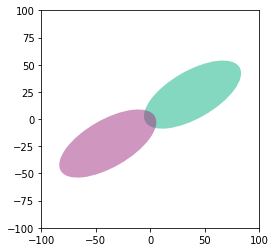

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Ellipse

focus=getfocus(rad0,ecc0)
b=getsemiminor(rad0,ecc0)
theta0deg=theta0*180/math.pi
signs=[1,-1]
ells = [Ellipse(xy=[focus*signi*np.cos(theta0),focus*signi*np.sin(theta0)],
                width=2*rad0, height=2*b,
                angle=theta0deg)
                for signi in signs]
                    

fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'})
for e in ells:
    ax.add_artist(e)
    e.set_clip_box(ax.bbox)
    e.set_alpha(0.5)
    e.set_facecolor(np.random.rand(3))

ax.set_xlim(-2*rad0,2*rad0)
ax.set_ylim(-2*rad0, 2*rad0)

print(focus, rad0,b,theta0)
plt.show()

Output using built in ellipse function matches orbits too. 